### Statistics and Trends 
For this assignment I will work on Iris Dataset and will analyze different features of the three species

In [22]:
#import the necessary library packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis


In [23]:
#read the csv file
iris = pd.read_csv(r"C:\Users\tiasa\OneDrive\Statistics _and _trends\IRIS.csv")
iris                 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
#overview of dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
#check for missing values
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


###  Create three types of Plots

I will define three functions to draw my plots to visualise the existing relation in the features of iris flower

### 1. Categorical Graph
Plot Overploted Histogram to show the distribution of Sepal length among three species

In [27]:
setosa = iris.iloc[0:50,0]
versicolor = iris.iloc[50:101,0]
virginica = iris.iloc[101:150,0]

In [28]:
import matplotlib.pyplot as plt
def plot_histogram(*datas):
    """
    Plot three histogram on top of each other
    """
    plt.figure(dpi=144)
    plt.hist(setosa, bins = 20, alpha=1, label='Iris-setosa', color='violet',histtype='stepfilled')
    plt.hist(versicolor, bins = 20, alpha=0.5, label='Iris-versicolor', color='red',histtype='stepfilled')
    plt.hist(virginica, bins = 20, alpha=0.5, label='Iris-virginica', color='yellow',histtype='stepfilled')

    # Formatting the plot
    
    plt.xlabel("sepal_length_(cm)",fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.title(" Sepal length of three Species ")
    plt.legend(fancybox=True,title="Species",shadow=True)
    plt.grid(color='grey', linestyle='dashed')
    # Show the plot
    plt.savefig("Distribution.jpg")
   
    

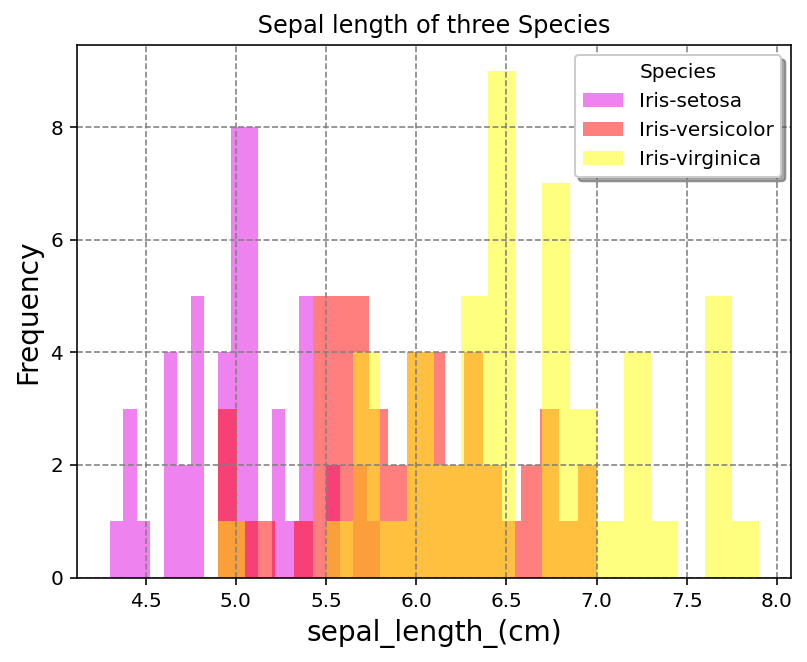

In [29]:
 plot_histogram(setosa, versicolor, virginica)

In [39]:
#major moments
skew_setosa = skew(iris[iris["species"]=='Iris-setosa']["sepal_length"])
skew_versicolor = skew(iris[iris["species"]=='Iris-versicolor']["sepal_length"])
skew_virginica = skew(iris[iris["species"]=='Iris-virginica']["sepal_length"])
kurt_setosa = kurtosis(iris[iris["species"]=='Iris-setosa']["sepal_length"], fisher = True)
kurt_versicolor = kurtosis(iris[iris["species"]=='Iris-versicolor']["sepal_length"], fisher = True)
kurt_virginica = kurtosis(iris[iris["species"]=='Iris-virginica']["sepal_length"], fisher = True)
df = pd.DataFrame({"skewness":[skew_setosa, skew_versicolor, skew_setosa], "kurtosis":[kurt_setosa, kurt_versicolor, kurt_virginica]}, index=["Setosa","Versicolor","Virginica"])
df

,skewness,kurtosis
Setosa,0.116454,-0.345765
Versicolor,0.102190,-0.598827
Virginica,0.116454,-0.087942


### 2. Relational Graph
Plot scatter diagram to show the relation between two features

In [31]:
pl = iris.petal_length
pw = iris.petal_width


In [32]:
def plot_random_scatter(pl, pw):
    """
    Creates a scatter plot using petal length (pl) and petal width (pw)
    """
    plt.figure(dpi=144)
    
    # Mapping species to numerical values
    iris["species_value"] = iris["species"].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
    
    # Scatter plot
    plt.scatter(pw, pl, s=20*pl, c=iris["species_value"], cmap='plasma', label=None , marker="o", alpha =0.7)
    
    # Formatting the plot
    plt.grid(color='grey', linestyle='dashed')
    plt.xlabel('Petal Width_(cm)')
    plt.ylabel('Petal Length_(cm)')
    plt.title('Petal Length vs Petal Width of three species')
 
    
    # featuring colorbar
    colorbar =  plt.colorbar(label='Species Value')  # Color bar to show species mapping
    colorbar.set_ticks([0, 1, 2])                    # Set ticks at species values
    colorbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
    
    #save the plot
    plt.savefig("Scatterplot.jpg")

    


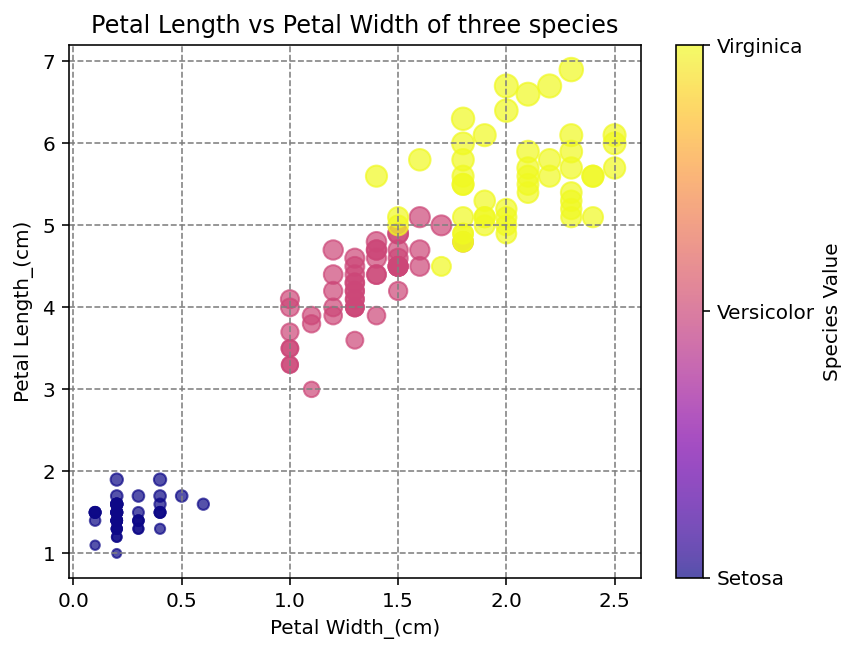

In [33]:
plot_random_scatter(pl, pw)

### 3. Statistical Graph
Plot Heatmap to visualise the correlation between each feature of iris dataset

In [34]:
#drop the last two column of species_value and species
iris_new = iris.drop(columns=["species_value","species"])
iris_new

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
def iris_plot_correlation(iris_new, method):
    """
    Plots correlation of four measurement of iris dataset
    """
    plt.figure(dpi = 144)
    sns.heatmap(iris_new.corr(method="pearson"), vmin=-1, vmax=1, cmap='BrBG', annot=True)
    plt.title('Correlation of Iris Dataset', fontsize=14)
    plt.savefig("heatmap.jpg")
    return

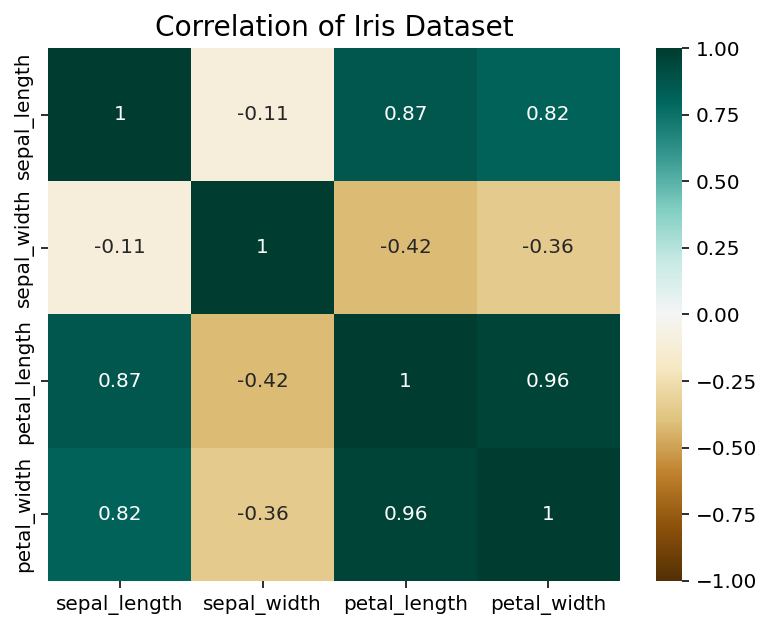

In [36]:
iris_plot_correlation(iris_new,'pearson')

In [37]:
#To look at some basic statistics
iris_new.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
